In [20]:
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv('train.csv.gz', index_col='Id')

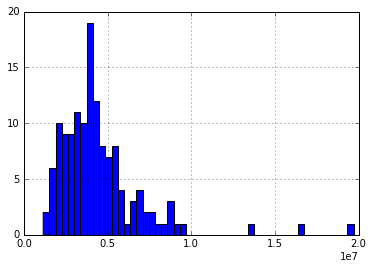

In [6]:
df.revenue.hist(bins=50)

In [17]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import FunctionTransformer
from sklearn.feature_extraction import DictVectorizer
from sklearn.pipeline import Pipeline

def days_to_delta(df):
    delta = np.timedelta64(1, 'D')
    days_open = (pd.to_datetime('2015-02-01') - pd.to_datetime(df['Open Date'])) / delta
    df['days_open'] = days_open
    return df.drop('Open Date', axis=1)

df2dict = FunctionTransformer(
    lambda x: x.to_dict(orient='records'), validate=False)

transf = Pipeline([
    ('day', FunctionTransformer(days_to_delta, validate=False)),
    ('md', df2dict),
    ('dv', DictVectorizer(sparse=False)),
    ('tsne', TSNE(n_components=2, init='pca', random_state=0))
])

features = df.drop(['revenue'], axis=1)
x1, x2 = transf.fit_transform(features).T

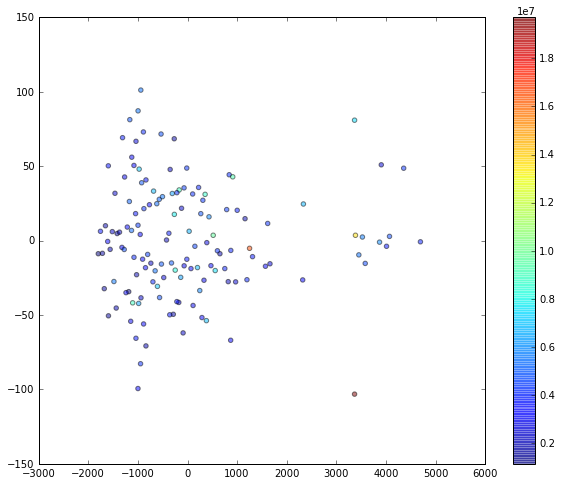

In [19]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams
rcParams['figure.figsize'] = (10, 8)

plt.scatter(x1, x2, c=df.revenue, alpha=0.5)
plt.colorbar()
plt.show()